In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')


#### Treemap: Goals by Team and Position

In [3]:
team_position_goals = ucl.groupby(['Team','Position'])['Goals'].sum().reset_index()

In [4]:
fig = px.treemap(
    team_position_goals,
    path=['Team', 'Position'],
    values='Goals',
    title='Treemap: Goals Scored by Team and Position',
    color='Goals',
)

fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [5]:
ucl['Total_Contrib'] = ucl['Goals'] + ucl['Assists']

In [6]:
ucl['Defensive_Score'] = ucl['Tackles_Won'] + ucl['Balls_recovered']

# 2) Grupim sipas Team → Position → Player, me Defensive_Score
defense_team = (
    ucl.groupby(['Team', 'Position', 'Player'])['Defensive_Score']
    .sum()
    .reset_index()
)

In [7]:
fig = px.treemap(
    defense_team,
    path=['Team', 'Position', 'Player'],
    values='Defensive_Score',
    title='Treemap: Defensive Contributions by Team, Position and Player',
    color='Defensive_Score',
    color_continuous_scale='OrRd'
)

fig.update_layout(margin=dict(t=60, l=0, r=0, b=0))
fig.show()

In [8]:
nationality_counts = ucl['Nationality'].value_counts()
print(nationality_counts)

Nationality
France           24
Netherlands      18
Germany          16
Spain            16
Brazil           15
Italy            11
England          11
Argentina        10
Belgium           9
Portugal          9
Switzerland       6
Turkey            5
Norway            4
Croatia           4
Morocco           3
Poland            3
Denmark           3
Canada            3
Uruguay           3
Scotland          3
United States     2
Slovenia          2
Japan             2
Ecuador           2
Ukraine           2
Ivory Coast       2
Greece            2
Georgia           2
Colombia          2
Nigeria           2
Algeria           1
Hungary           1
Iran              1
Mexico            1
Armenia           1
Portugal          1
BosniaH           1
Senegal           1
South Korea       1
Egypt             1
Sweden            1
Ghana             1
Austria           1
Russia            1
Name: count, dtype: int64


In [9]:
nationality_counts = ucl['Nationality'].value_counts().head(20).reset_index()
nationality_counts.columns = ['Nationality', 'Count']

nationality_counts

,Nationality,Count
0,France,24
1,Netherlands,18
2,Germany,16
3,Spain,16
4,Brazil,15
5,Italy,11
6,England,11
7,Argentina,10
8,Belgium,9
9,Portugal,9


In [10]:
teams_sf = ucl.loc[ucl['Phase'] == 'Semi_finals', 'Team'].unique()

print("Skuadrat në Semi-finals:", teams_sf)

Skuadrat në Semi-finals: ['Arsenal FC' 'Barcelona']


In [11]:
teams_final = ucl.loc[ucl['Phase'] == 'Final', 'Team'].unique()

print("Skuadrat në Final:", teams_final)

Skuadrat në Final: ['Inter' 'Paris SG']


In [12]:
teams_qf = ucl.loc[ucl['Phase'] == 'Quarter_finals', 'Team'].unique()

print("Skuadrat në Quarter finals:", teams_qf)

Skuadrat në Quarter finals: ['Real Madrid' 'BVB Dortmund' 'Aston Villa' 'Bayern Munich']


In [13]:
teams_r16 = ucl.loc[ucl['Phase'] == 'Round16', 'Team'].unique()

print("Skuadrat ne Round 16:", teams_r16)

Skuadrat ne Round 16: ['Liverpool FC' 'Club Brugge' 'Benfica' 'Atletico Madrid' 'PSV Eindhoven'
 'Lille ' 'Bayer Leverkusen' 'Feyenoord']


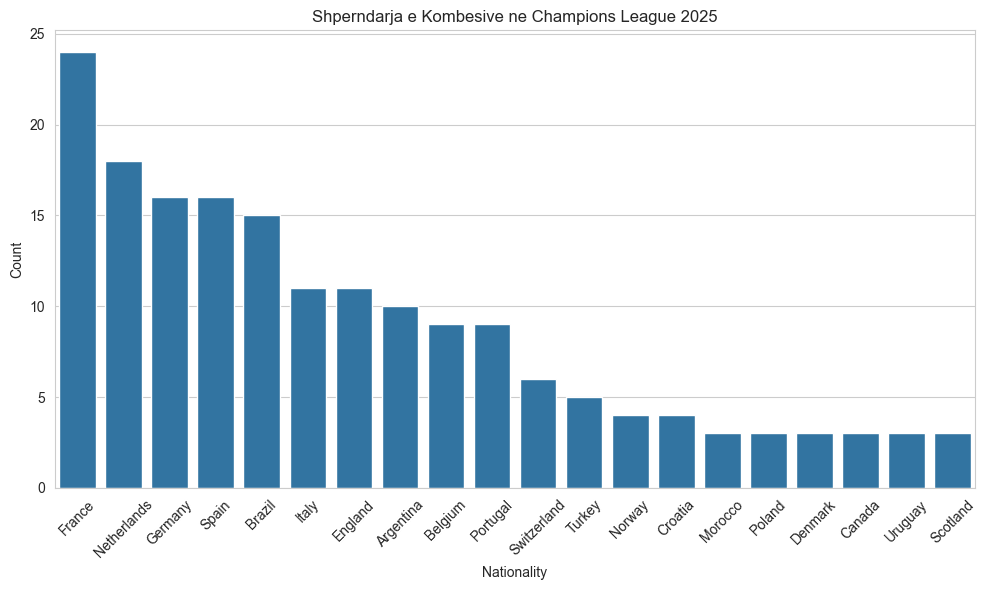

In [23]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Nationality', data=ucl, order=nationality_counts['Nationality'].head(20))
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Shperndarja e Kombesive ne Champions League 2025')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
ucl.groupby('Nationality')['Player'].count().sort_values(ascending=False)

Nationality
France           24
Netherlands      18
Spain            16
Germany          16
Brazil           15
Italy            11
England          11
Argentina        10
Belgium           9
Portugal          9
Switzerland       6
Turkey            5
Croatia           4
Norway            4
Uruguay           3
Poland            3
Scotland          3
Morocco           3
Canada            3
Denmark           3
Ukraine           2
United States     2
Slovenia          2
Nigeria           2
Colombia          2
Ecuador           2
Greece            2
Georgia           2
Japan             2
Ivory Coast       2
Armenia           1
Austria           1
BosniaH           1
Algeria           1
Egypt             1
Hungary           1
Mexico            1
Iran              1
Ghana             1
Portugal          1
Senegal           1
Russia            1
Sweden            1
South Korea       1
Name: Player, dtype: int64

In [56]:
unique_teams_series = pd.Series(ucl['Nationality'].unique())
print(unique_teams_series)

0            France
1             Italy
2            Poland
3            Brazil
4       Netherlands
5           England
6            Norway
7           Morocco
8           Belgium
9         Argentina
10           Canada
11    United States
12            Spain
13          Algeria
14         Portugal
15          Germany
16          Georgia
17          Hungary
18         Scotland
19           Turkey
20           Greece
21             Iran
22          Ecuador
23           Mexico
24         Slovenia
25            Japan
26          Uruguay
27          Croatia
28      Switzerland
29        Portugal 
30          Denmark
31          Armenia
32          BosniaH
33          Senegal
34      Ivory Coast
35          Ukraine
36            Egypt
37      South Korea
38          Nigeria
39           Sweden
40            Ghana
41          Austria
42         Colombia
43           Russia
dtype: object
